In [220]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as show
from numpy import*
from scipy.stats import binom
mean0 = [0,0]
mean1 = [1,1]
cov = mat([[1,0.2],[0.2,1]])
a = list(binom.rvs(1,0.5,size = 100))
num0 = a.count(0)
num1 = a.count(1)
print(num0,num1)
#test sample size = 20. Bionomial
#The first class points which label equals 0
x0 = random.multivariate_normal(mean0,cov,num0).T
x1 = random.multivariate_normal(mean1,cov,num1).T

52 48


In [221]:
#Caculate the parameters of optical classifier
from numpy import*
mean0 = [0,0]
mean1 = [1,1]
cov = mat([[1,0.2],[0.2,1]])
u0 = mat(mean0)
u1 = mat(mean1)
a = (cov.I)*u1.T
b = -0.5*(u1-u0)*cov.I*(u1+u0).T
print (a,b)
#We can tell the optimal classifier is: X2 = -X1 + 1

[[ 0.83333333]
 [ 0.83333333]] [[-0.83333333]]


In [222]:
#Caculate the parameters of LDA classifier
from numpy import*
u0lda = mat([mean(x0[0]),mean(x0[1])])
u1lda = mat([mean(x1[0]),mean(x1[1])])
sigma0 = cov(x0)*(num0/(num0+num1))
sigma1 = cov(x1)*(num1/(num0+num1))
sigma = mat(sigma0 + sigma1)
a = sigma.I * (u1lda - u0lda).T
b = -0.5*(u1lda-u0lda)*sigma.I*(u1lda+u0lda).T
print (a)
print (b)

#The LDA classifier is: X2 = 0.46 - 0.476X1

[[ 0.76377881]
 [ 0.85490789]]
[[-0.71709188]]


In [223]:
from scipy.stats import norm
#Caculate LDA error using fomula given in class.
p1 = norm.cdf((a.T*u0lda.T+b)/math.sqrt(a.T*sigma*a))
p2 = norm.cdf(-(a.T*u1lda.T+b)/math.sqrt(a.T*sigma*a))
p = (p1+p2)/2
print(p)

[[ 0.27027094]]


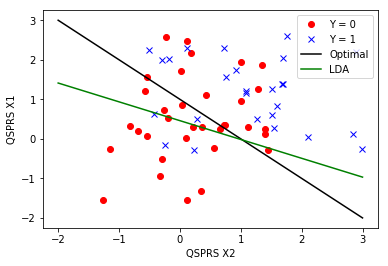

In [205]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as show
#Scatter Plot
plt.figure(1)
plt.plot(x0[0],x0[1],"ro",label = "Y = 0")
plt.plot(x1[0],x1[1],"bx",label = "Y = 1")
#Plot Optimal Classifier
x = range(-2,4)
y = [(-1.0)*(i-1) for i in x]
plt.plot(x,y,color = "black",label = "Optimal")
x = range(-2,4)
y = [0.46 - 0.476*i for i in x]
plt.plot(x,y,color = "green",label = "LDA")
plt.xlabel("QSPRS X1")
plt.ylabel("QSPRS X2")
plt.legend()
plt.show()

In [234]:
a20 = [1.98746615,2.04044144]
b20 = [-0.94682551]
a40 = [0.98656808,0.71559943]
b40 = [-0.79590998]
a60 = [1.12469609,0.65710453]
b60 = [-1.29334251]
a80 = [1.33099828,1.11921442]
b80 = [-1.3012341]
a100 = [0.76377881,0.85490789]
b100 = [-0.71709188]

-0.94682551

In [245]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as show
from numpy import*
from scipy.stats import binom
mean0 = [0,0]
mean1 = [1,1]
cov = mat([[1,0.2],[0.2,1]])
a = list(binom.rvs(1,0.5,size = 500))
num0 = a.count(0)
num1 = a.count(1)
print(num0,num1)
#test sample size = 20. Bionomial
#The first class points which label equals 0
x0 = random.multivariate_normal(mean0,cov,num0).T
x1 = random.multivariate_normal(mean1,cov,num1).T
def f(a,b,x1,x2):
    y = x1*a[0] + x2*a[1]+b[0]
    return y

num020,num040,num060,num080,num0100 = 0,0,0,0,0
num120,num140,num160,num180,num1100 = 0,0,0,0,0
for i in x0.T:
    if f(a20,b20,i[0],i[1]) > 0:
        num020 += 1
    if f(a40,b40,i[0],i[1]) > 0:
        num040 += 1
    if f(a60,b60,i[0],i[1]) > 0:
        num060 += 1
    if f(a80,b80,i[0],i[1]) > 0:
        num080 += 1
    if f(a100,b100,i[0],i[1]) > 0:
        num0100 += 1
for i in x1.T:
    if f(a20,b20,i[0],i[1]) < 0:
        num120 += 1
    if f(a40,b40,i[0],i[1]) < 0:
        num140 += 1
    if f(a60,b60,i[0],i[1]) < 0:
        num160 += 1
    if f(a80,b80,i[0],i[1]) < 0:
        num180 += 1
    if f(a100,b100,i[0],i[1]) < 0:
        num1100 += 1

262 238


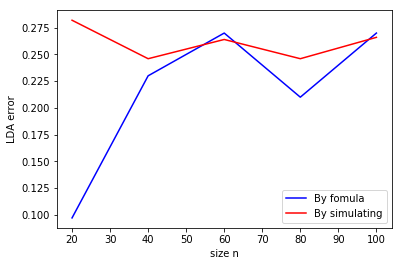

In [255]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as show
x = [20,40,60,80,100]
y1 = [0.097,0.23,0.27,0.21,0.27]
y2 = [(num020+num120)/500,(num040+num140)/500,
      (num060+num160)/500,(num080+num180)/500,
      (num0100+num1100)/500,]
plt.figure(1)
plt.plot(x,y1,"b-",label="By fomula")
plt.plot(x,y2,"r-",label="By simulating")
plt.xlabel("size n")
plt.ylabel("LDA error")
plt.legend()
plt.show()

In [247]:
num020+num120

141

In [248]:
num040+num140

123

In [249]:
num060+num160

132

In [250]:
num080+num180

123

In [251]:
num0100+num1100

133

In [253]:
y2

[0.282, 0.246, 0.264, 0.246, 0.266]